In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cpu (from versions: 2.0.0, 2.0.0+cpu, 2.0.0+cu117, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cu117, 2.0.1+cu118, 2.1.0, 2.1.0+cpu, 2.1.0+cu118, 2.1.0+cu121)
ERROR: No matching distribution found for torch==1.9.0+cpu


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import torch 
import keras
from torch import nn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [85]:
Bank = pd.read_csv(r"C:\Users\hp\Downloads\bank_additional_data.csv")

In [86]:
Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [87]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2999 non-null   int64  
 1   job             2999 non-null   object 
 2   marital         2999 non-null   object 
 3   education       2999 non-null   object 
 4   default         2999 non-null   object 
 5   housing         2999 non-null   object 
 6   loan            2999 non-null   object 
 7   contact         2999 non-null   object 
 8   month           2999 non-null   object 
 9   day_of_week     2999 non-null   object 
 10  duration        2999 non-null   int64  
 11  campaign        2999 non-null   int64  
 12  pdays           2999 non-null   int64  
 13  previous        2999 non-null   int64  
 14  poutcome        2999 non-null   object 
 15  emp.var.rate    2999 non-null   float64
 16  cons.price.idx  2999 non-null   float64
 17  cons.conf.idx   2999 non-null   f

In [88]:
Bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [89]:
Bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.889296,255.085028,2.526842,962.227743,0.192064,0.079093,93.584553,-40.578226,3.605769,5165.642314
std,10.282229,256.265737,2.556995,187.599866,0.551960,1.559126,0.581162,4.594237,1.739625,74.384632
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,316.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [90]:
Bank.describe(include='object').transpose()

,count,unique,top,freq
job,2999,12,admin.,743
marital,2999,4,married,1812
education,2999,7,university.degree,915
default,2999,2,no,2403
housing,2999,3,yes,1589
loan,2999,3,no,2437
contact,2999,2,cellular,1935
month,2999,10,may,1024
day_of_week,2999,5,thu,628
poutcome,2999,3,nonexistent,2567


In [91]:
Bank.shape

(2999, 21)

In [92]:
Bank[Bank.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [93]:
Bank.drop_duplicates(inplace=True)
Bank[Bank.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


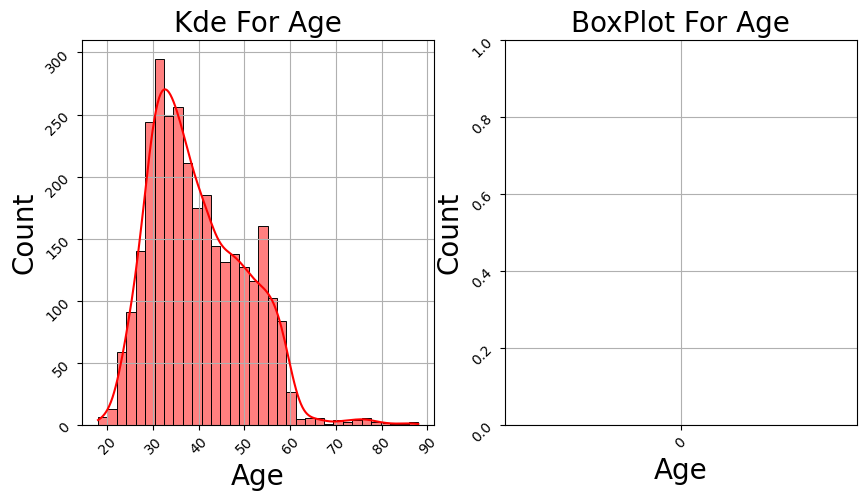

In [94]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(Bank.age,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(Bank=Bank.age,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [95]:
q25,q75=np.percentile(Bank.age,(25,75))
qr=q75-q25
max=q75+qr*1.5
min=q25-qr*1.5
Bank.age[Bank.age>max]=max
Bank.age[Bank.age<min]=min
q25,q75,qr,max,min

C:\Users\hp\AppData\Local\Temp\ipykernel_480\831317325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank.age[Bank.age>max]=max


(32.0, 47.0, 15.0, 69.5, 9.5)

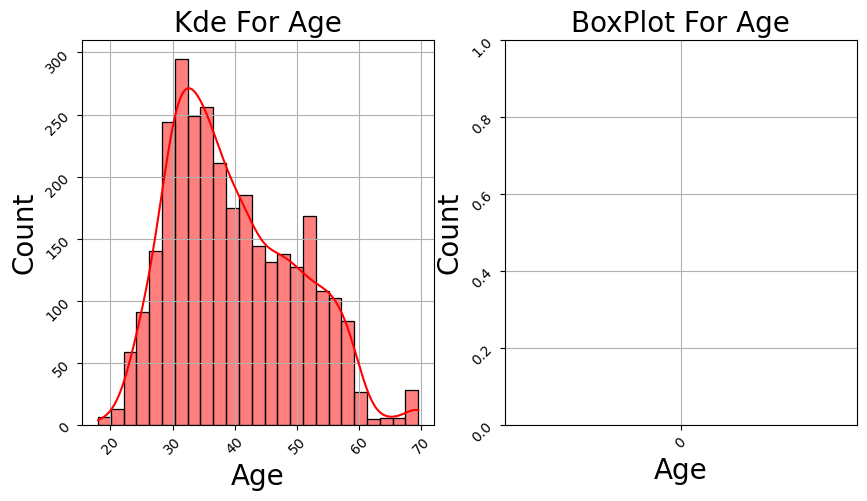

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(Bank.age,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(Bank=Bank.age,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [97]:
Bank.job.value_counts()

admin.           743
blue-collar      644
technician       496
services         294
management       233
retired          118
self-employed    114
entrepreneur     112
unemployed        85
housemaid         70
student           58
unknown           32
Name: job, dtype: int64

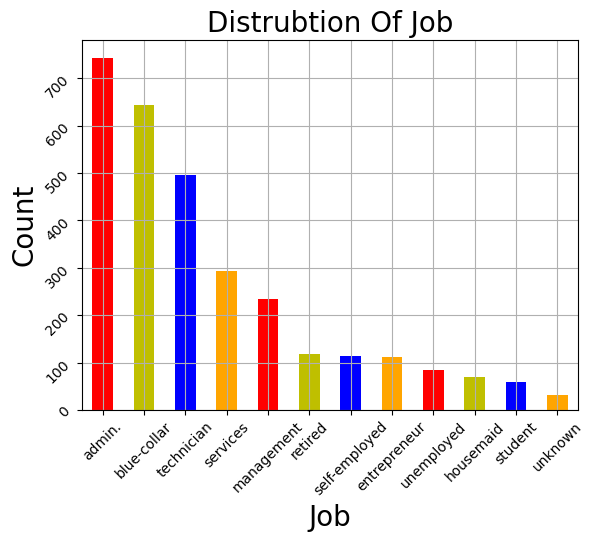

In [98]:
Bank.job.value_counts().plot.bar(color=['r','y','b','orange'])
plt.grid(True)
plt.title('Distrubtion Of Job',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [99]:
pd.crosstab(Bank.y,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,645,594,104,64,214,91,107,268,46,435,71,29
yes,98,50,8,6,19,27,7,26,12,61,14,3


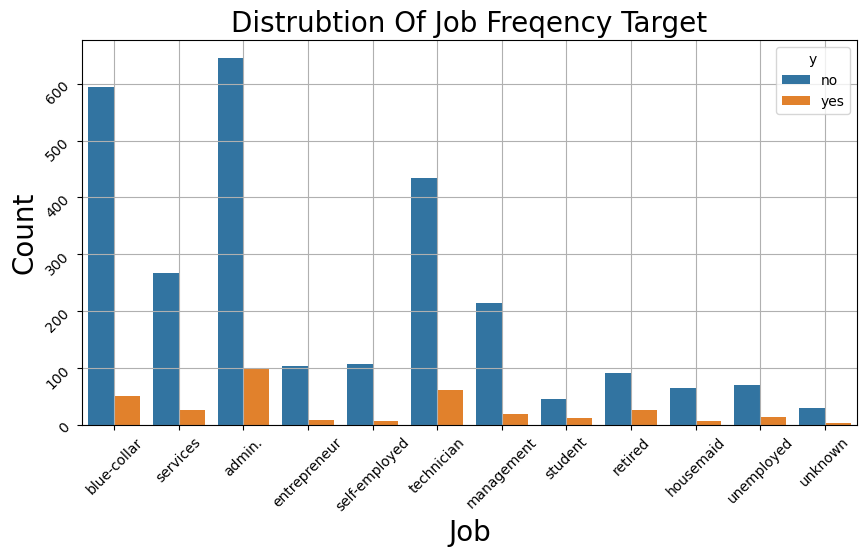

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Target',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [101]:
pd.crosstab(Bank.loan,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
loan,,,,,,,,,,,,
no,616,523,92,57,187,92,89,231,51,405,69,25
unknown,10,21,1,1,3,3,5,15,0,14,4,0
yes,117,100,19,12,43,23,20,48,7,77,12,7


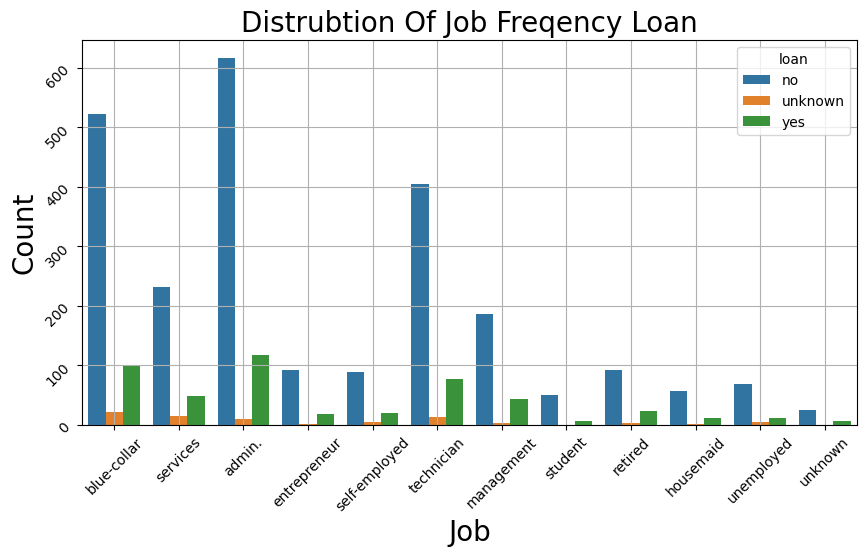

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='loan',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Loan',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [103]:
Bank.groupby(['y','loan','job'])['job'].count()

y    loan     job          
no   no       admin.           531
              blue-collar      484
              entrepreneur      85
              housemaid         51
              management       172
              retired           70
              self-employed     84
              services         210
              student           40
              technician       355
              unemployed        58
              unknown           22
     unknown  admin.            10
              blue-collar       21
              entrepreneur       1
              housemaid          1
              management         2
              retired            3
              self-employed      5
              services          14
              technician        11
              unemployed         4
     yes      admin.           104
              blue-collar       89
              entrepreneur      18
              housemaid         12
              management        40
              retired      

In [104]:
pd.crosstab(Bank.contact,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
contact,,,,,,,,,,,,
cellular,516,361,62,43,168,82,70,179,41,340,57,16
telephone,227,283,50,27,65,36,44,115,17,156,28,16


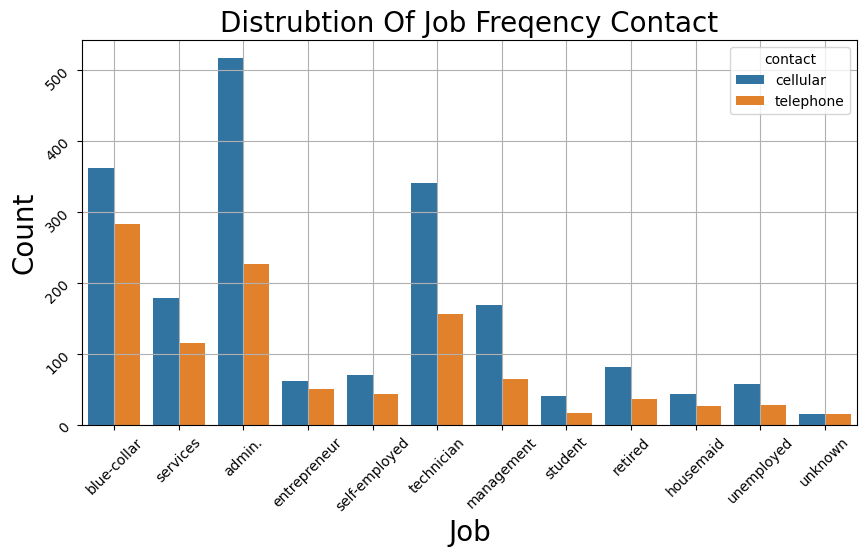

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='contact',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Contact',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [106]:
pd.crosstab(Bank.marital,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,81,52,19,12,32,19,9,34,0,55,7,2
married,370,453,81,47,169,86,71,182,1,274,55,23
single,290,138,12,11,32,11,33,77,57,166,22,7
unknown,2,1,0,0,0,2,1,1,0,1,1,0


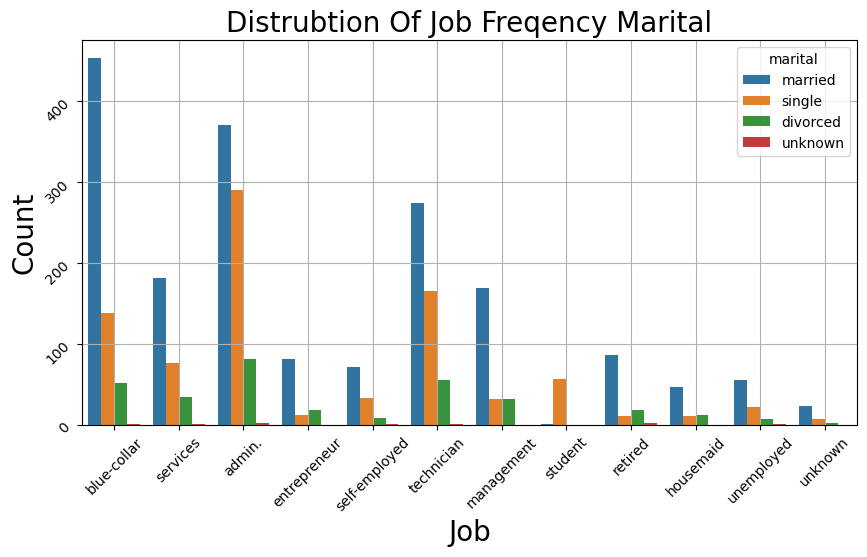

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='marital',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Marital',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [108]:
pd.crosstab(Bank.education,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,6,157,14,30,10,36,10,15,2,4,11,3
basic.6y,16,114,5,4,6,5,2,8,0,9,3,1
basic.9y,32,232,15,2,12,11,21,40,3,24,16,6
high.school,234,66,13,10,29,17,10,189,23,68,16,5
professional.course,28,38,13,5,5,21,8,16,5,232,8,2
university.degree,407,4,45,16,161,24,60,15,9,143,28,3
unknown,20,33,7,3,10,4,3,11,16,16,3,12


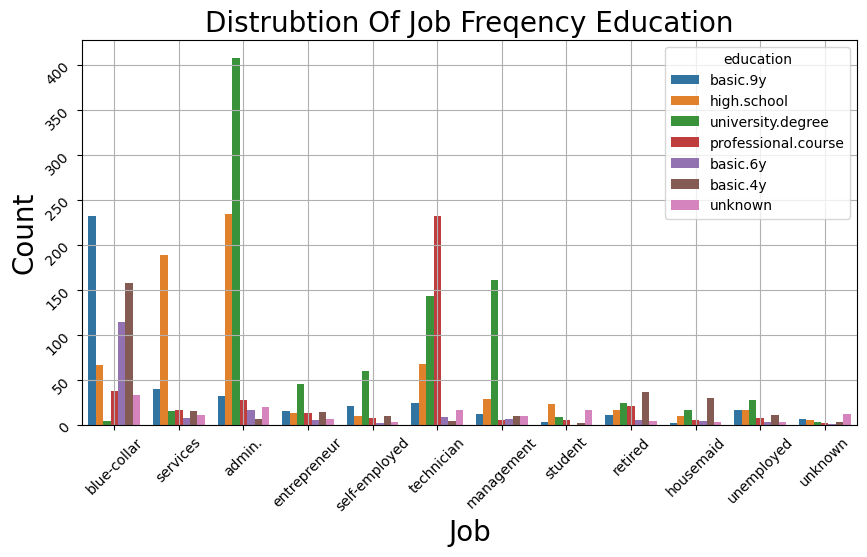

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='education',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Education',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [110]:
pd.crosstab(Bank.default,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
default,,,,,,,,,,,,
no,657,437,83,50,201,88,94,222,48,433,72,18
unknown,86,207,29,20,32,30,20,72,10,63,13,14


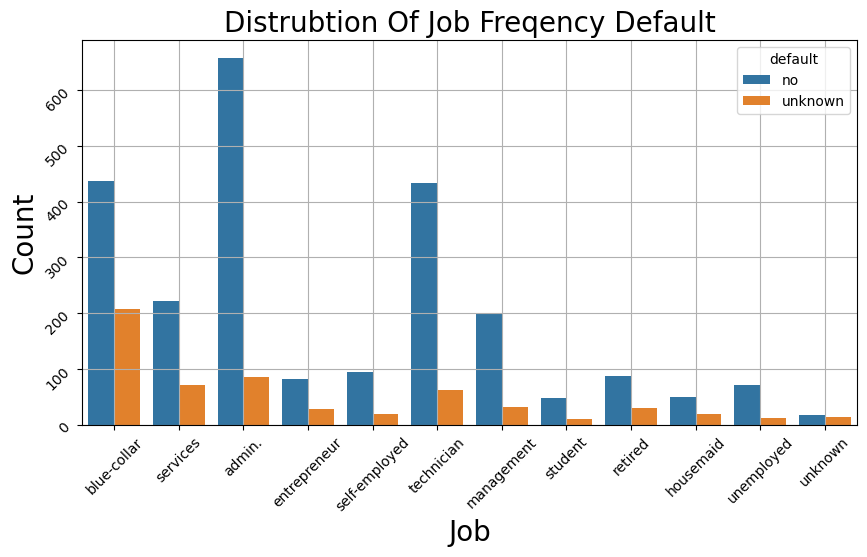

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='default',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Default',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [112]:
pd.crosstab(Bank.housing,Bank.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,313,303,44,31,99,49,55,150,31,209,33,16
unknown,10,21,1,1,3,3,5,15,0,14,4,0
yes,420,320,67,38,131,66,54,129,27,273,48,16


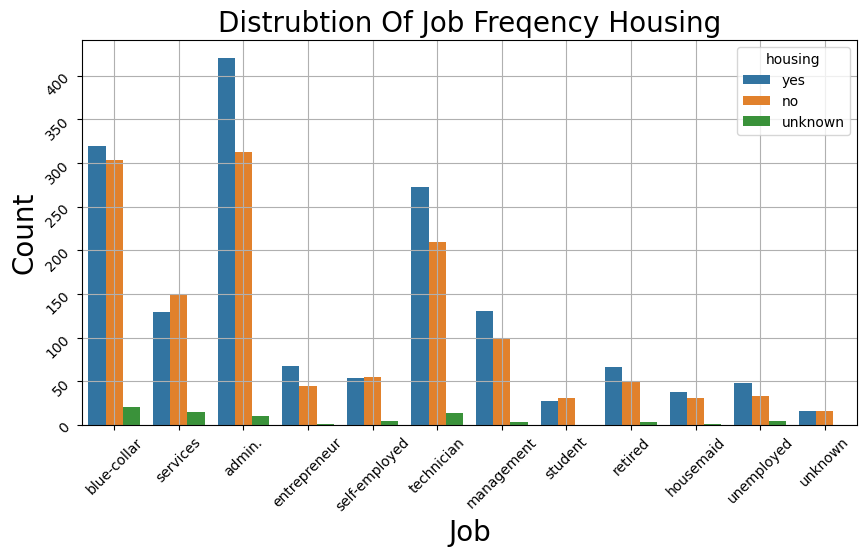

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='housing',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Housing',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [114]:
Bank.education.value_counts()

university.degree      915
high.school            680
basic.9y               414
professional.course    381
basic.4y               298
basic.6y               173
unknown                138
Name: education, dtype: int64

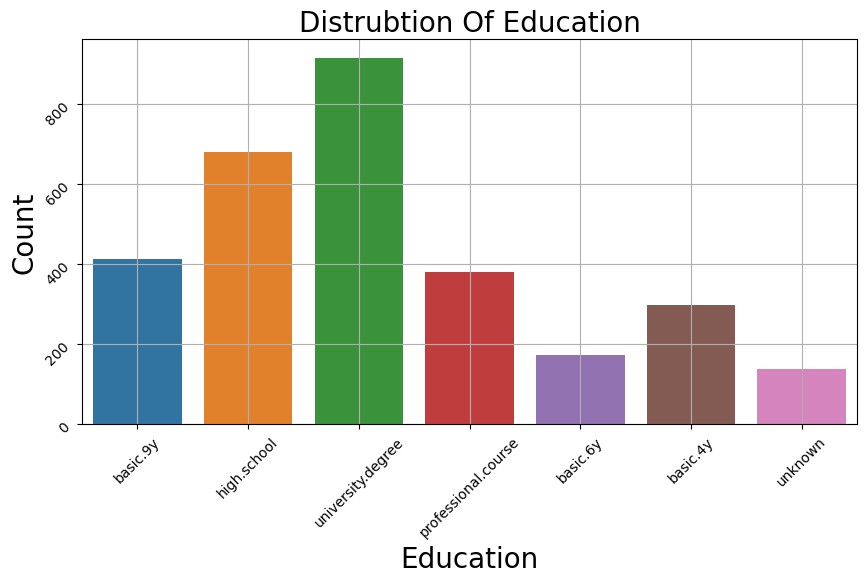

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Education',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [116]:
pd.crosstab(Bank.y,Bank.education)

education,basic.4y,basic.6y,basic.9y,high.school,professional.course,university.degree,unknown
y,,,,,,,
no,269,160,382,610,338,793,116
yes,29,13,32,70,43,122,22


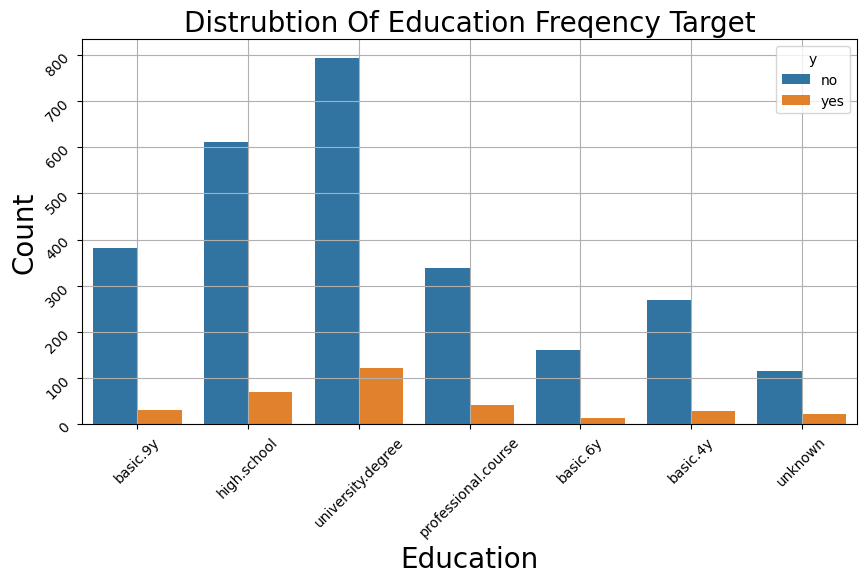

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Education Freqency Target',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [118]:
Bank.marital.value_counts()

married     1812
single       856
divorced     322
unknown        9
Name: marital, dtype: int64

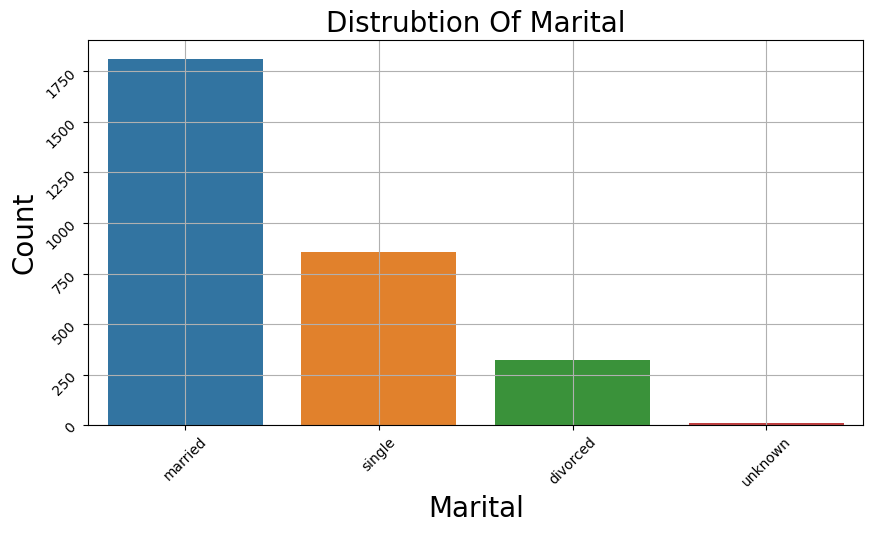

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Marital',fontsize=20)
plt.xlabel('Marital',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [120]:
pd.crosstab(Bank.y,Bank.marital)

marital,divorced,married,single,unknown
y,,,,
no,290,1629,741,8
yes,32,183,115,1


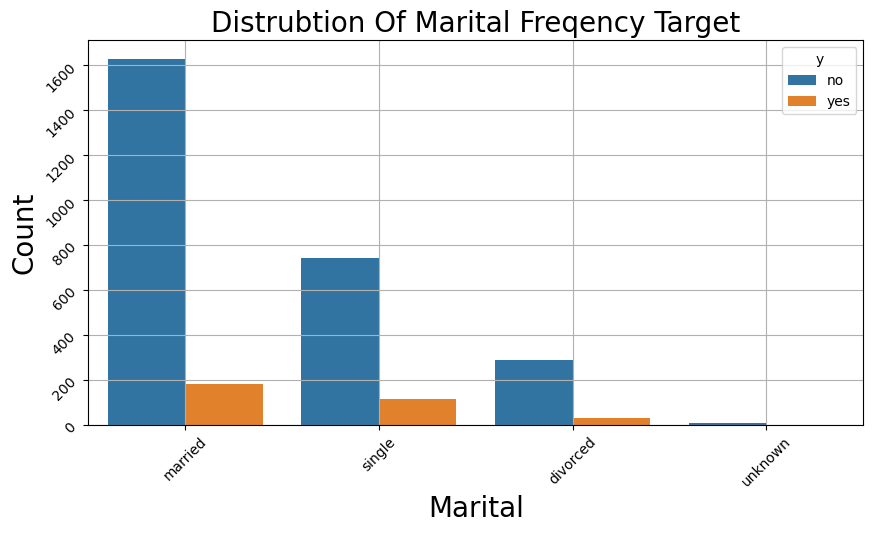

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Marital Freqency Target',fontsize=20)
plt.xlabel('Marital',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [122]:
Bank.loan.value_counts()

no         2437
yes         485
unknown      77
Name: loan, dtype: int64

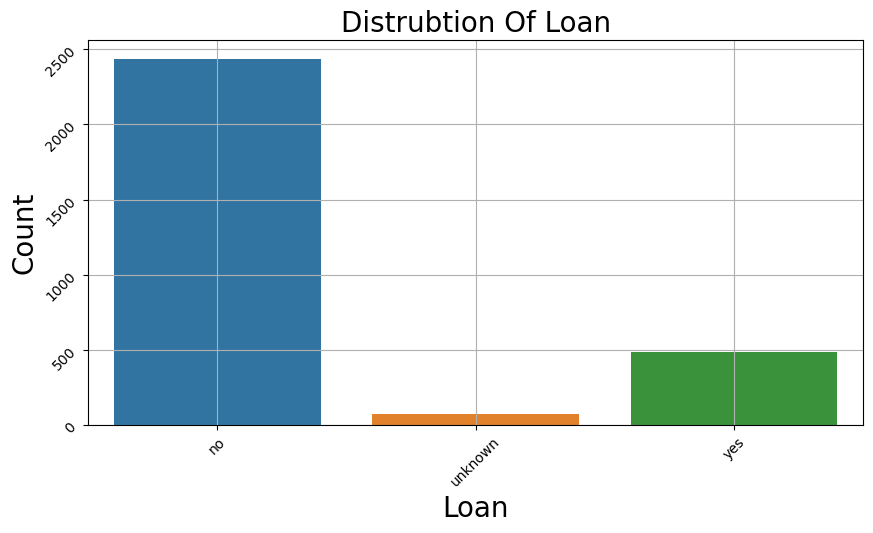

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Loan',fontsize=20)
plt.xlabel('Loan',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [124]:
pd.crosstab(Bank.y,Bank.loan)

loan,no,unknown,yes
y,,,
no,2162,72,434
yes,275,5,51


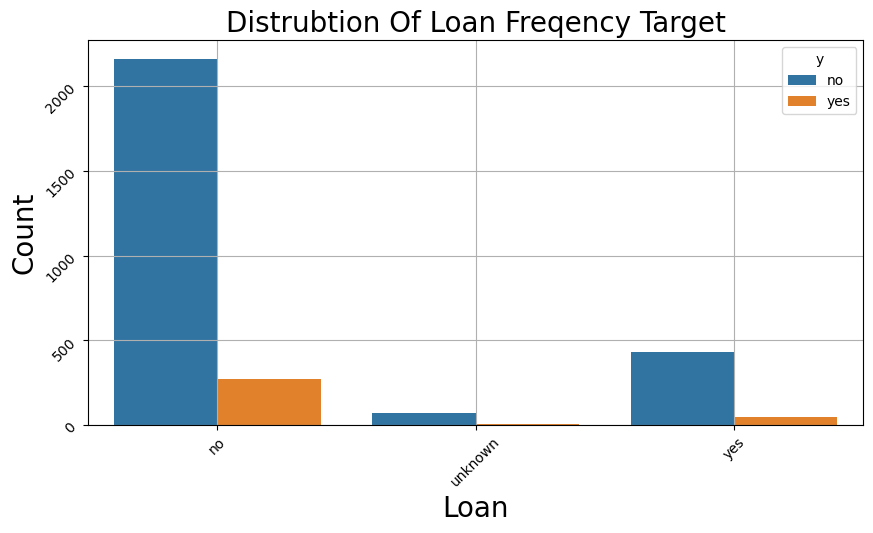

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Loan Freqency Target',fontsize=20)
plt.xlabel('Loan',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [126]:
Bank.default.value_counts()

no         2403
unknown     596
Name: default, dtype: int64

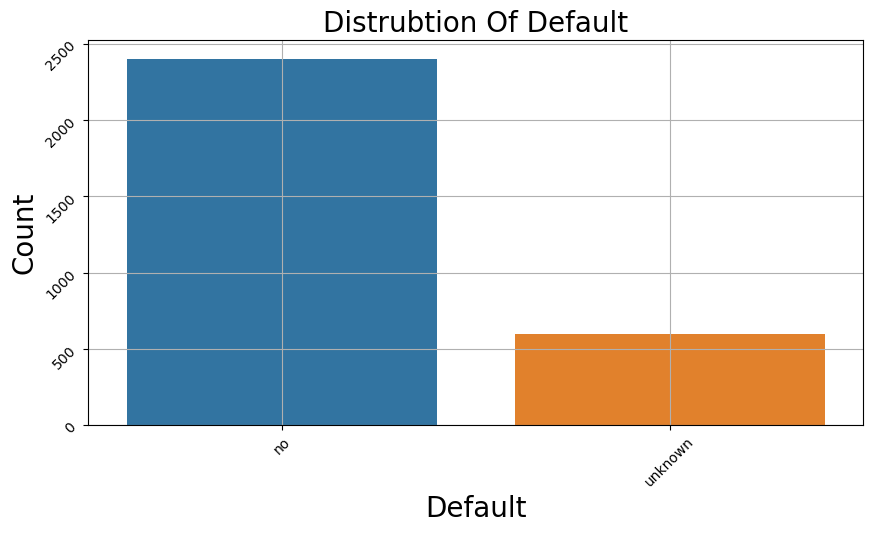

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Default',fontsize=20)
plt.xlabel('Default',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [128]:
pd.crosstab(Bank.y,Bank.default)

default,no,unknown
y,,
no,2114,554
yes,289,42


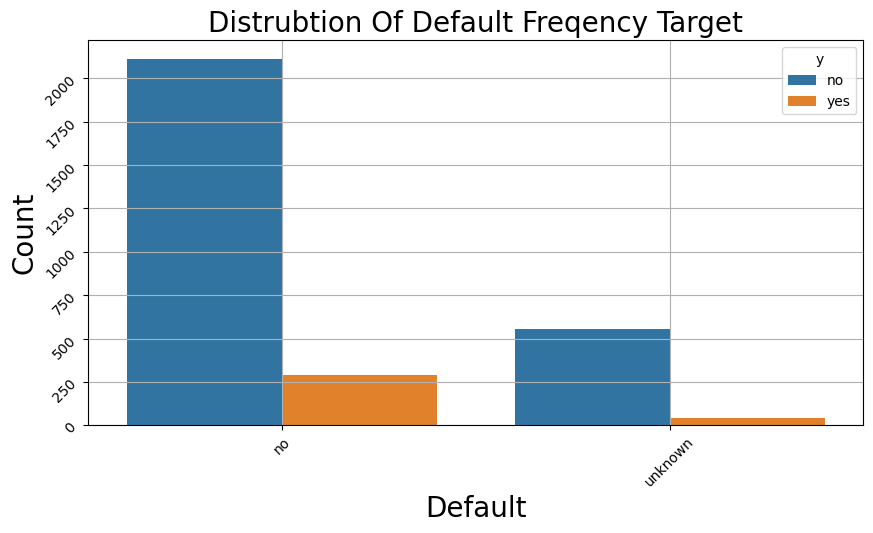

In [129]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Default Freqency Target',fontsize=20)
plt.xlabel('Default',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [130]:
Bank.contact.value_counts()

cellular     1935
telephone    1064
Name: contact, dtype: int64

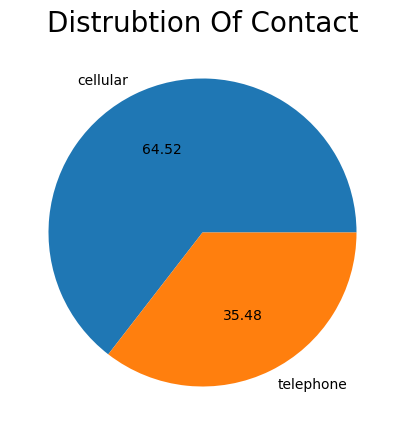

In [131]:
plt.figure(figsize=(10,5))
plt.pie(Bank.contact.value_counts().values,labels=Bank.contact.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Contact',fontsize=20)
plt.show()

In [132]:
pd.crosstab(Bank.y,Bank.contact)

contact,cellular,telephone
y,,
no,1664,1004
yes,271,60


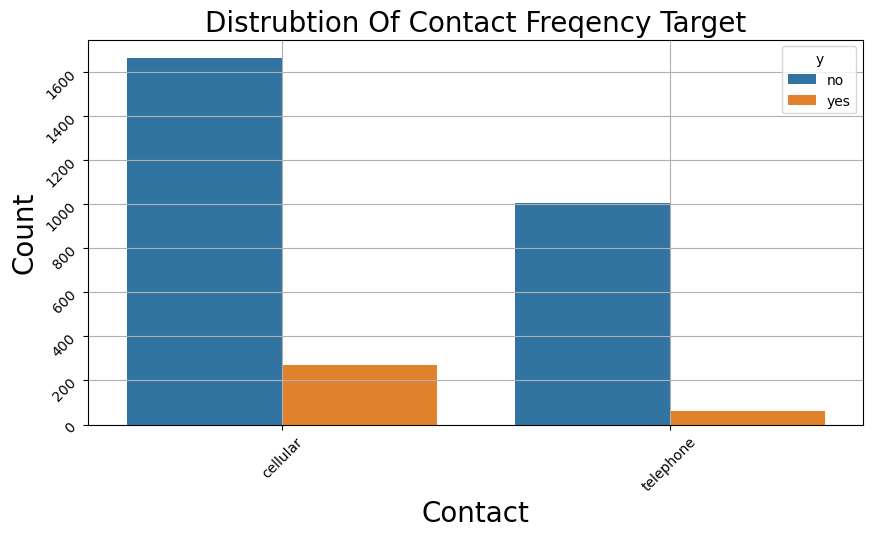

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='y',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Contact Freqency Target',fontsize=20)
plt.xlabel('Contact',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [134]:
Bank.y.value_counts()

no     2668
yes     331
Name: y, dtype: int64

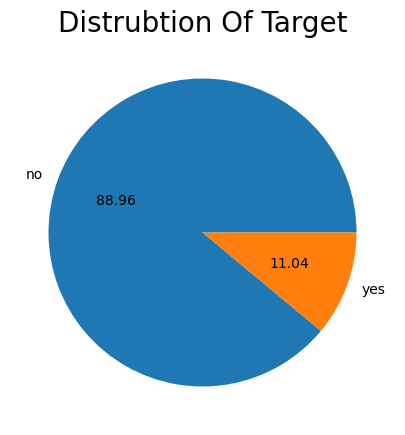

In [135]:
plt.figure(figsize=(10,5))
plt.pie(Bank.y.value_counts().values,labels=Bank.y.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Target',fontsize=20)
plt.show()


In [136]:
Bank.month.value_counts()

may    1024
jul     524
aug     451
jun     383
nov     321
apr     151
oct      52
sep      50
mar      29
dec      14
Name: month, dtype: int64

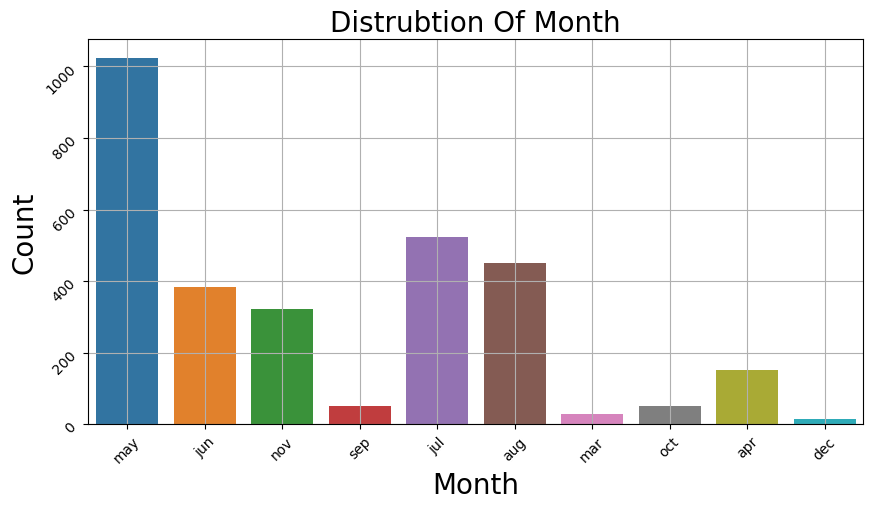

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=Bank)
plt.grid(True)
plt.title('Distrubtion Of Month',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [138]:
pd.crosstab(Bank.y,Bank.month)

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,127,407,7,473,331,14,956,288,34,31
yes,24,44,7,51,52,15,68,33,18,19


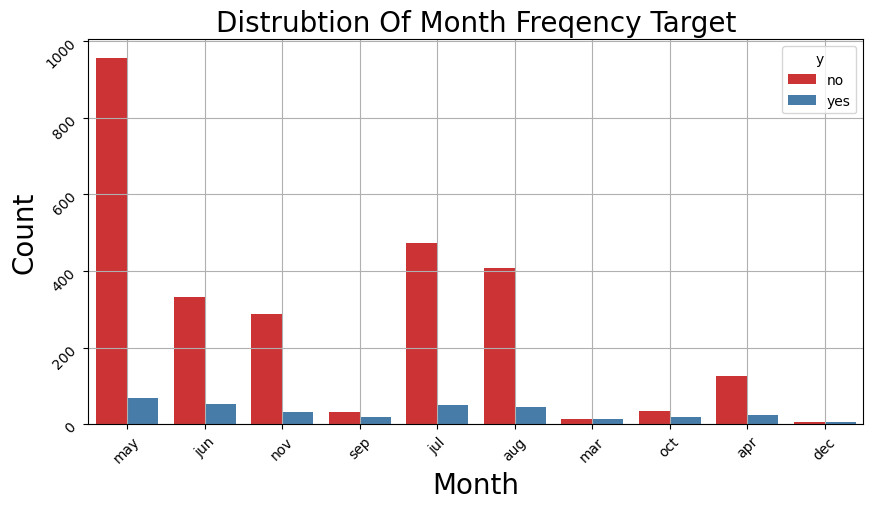

In [139]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='y',data=Bank,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Month Freqency Target',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [140]:
Bank.day_of_week.value_counts()

thu    628
tue    619
mon    616
wed    597
fri    539
Name: day_of_week, dtype: int64

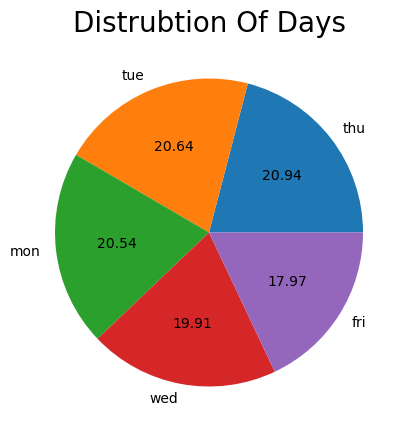

In [141]:
plt.figure(figsize=(10,5))
plt.pie(Bank.day_of_week.value_counts().values,labels=Bank.day_of_week.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Days',fontsize=20)
plt.show()

In [142]:
pd.crosstab(Bank.month,Bank.day_of_week)

day_of_week,fri,mon,thu,tue,wed
month,,,,,
apr,46,39,40,14,12
aug,70,88,105,105,83
dec,1,5,5,0,3
jul,74,107,127,109,107
jun,83,90,67,73,70
mar,4,9,4,8,4
may,197,189,174,227,237
nov,46,64,83,58,70
oct,9,16,11,9,7


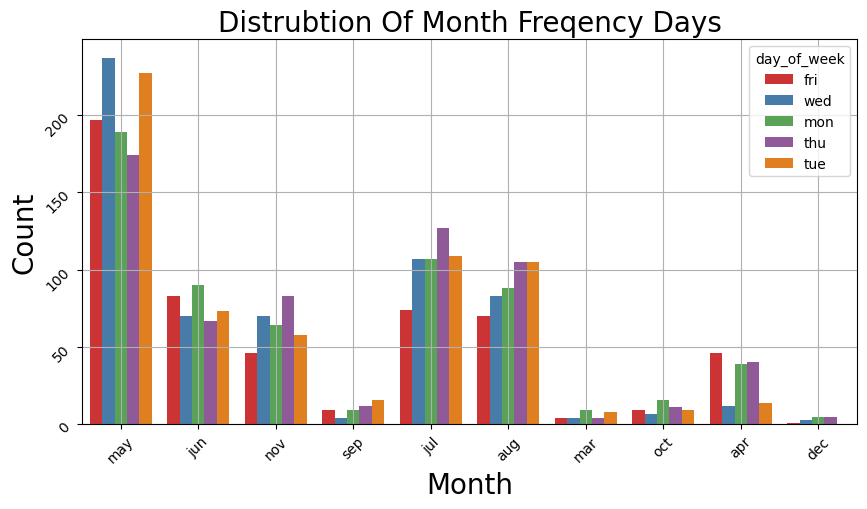

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='day_of_week',data=Bank,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Month Freqency Days',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

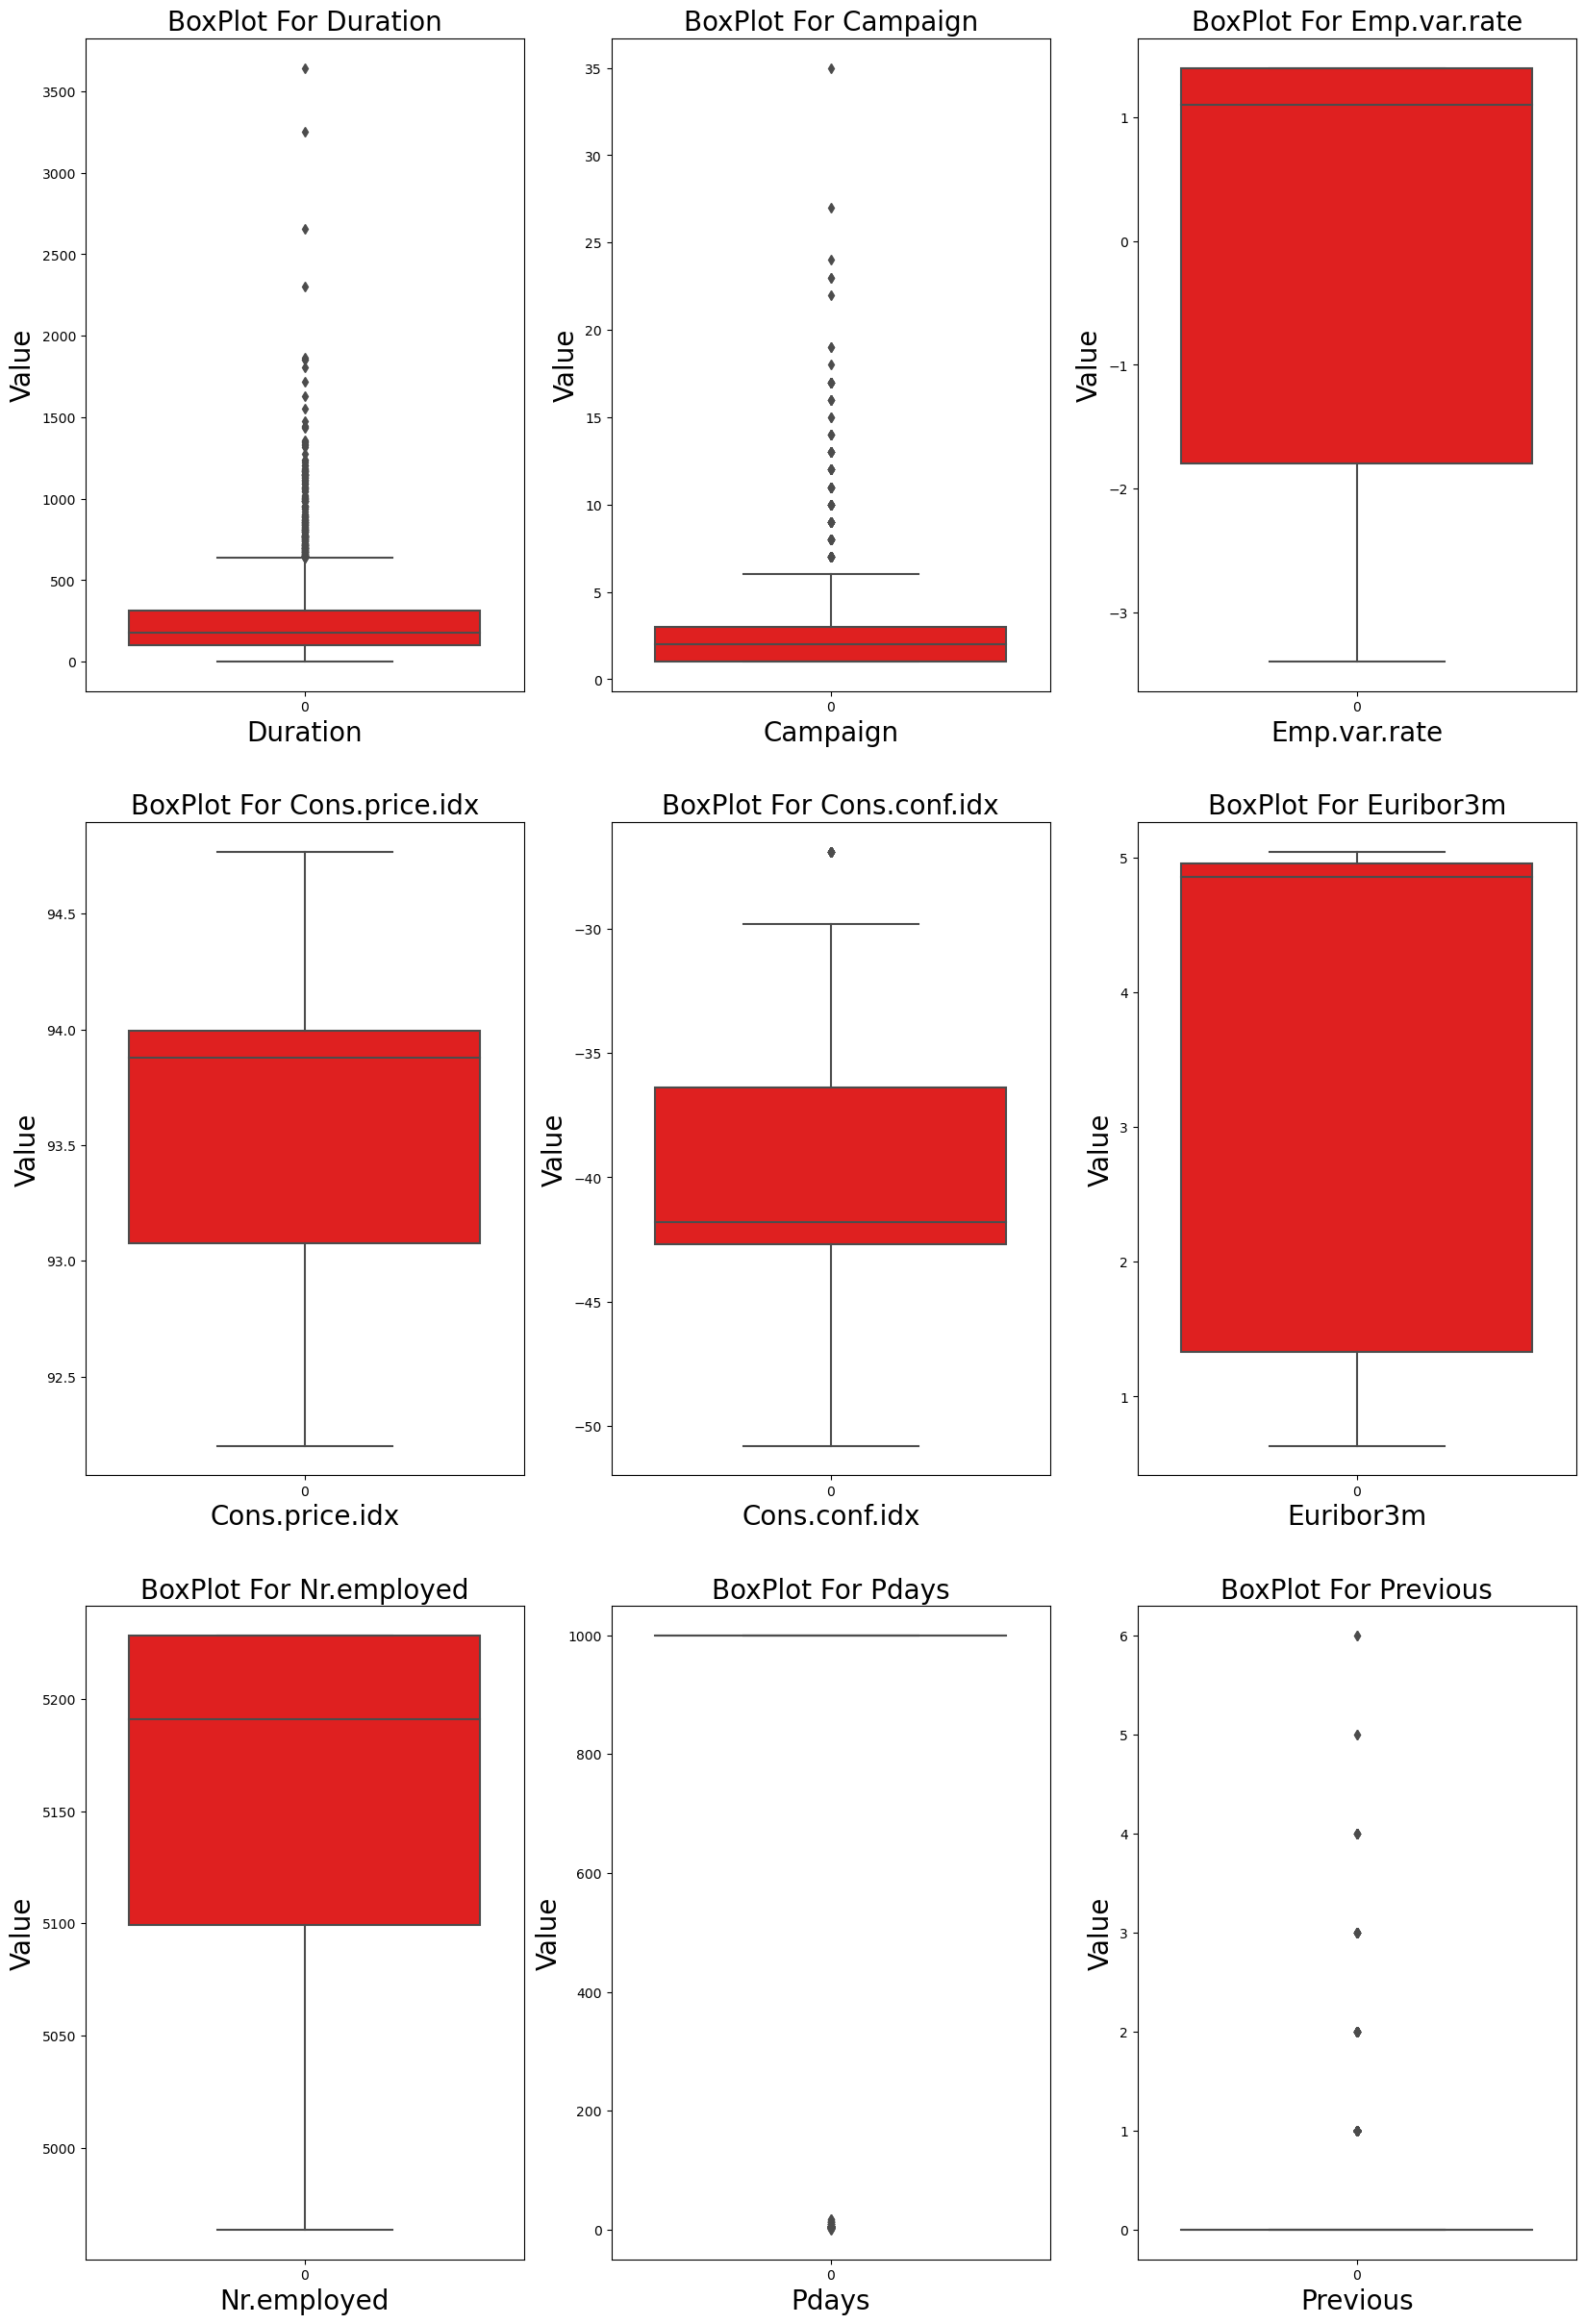

In [144]:
li=['duration','campaign','emp.var.rate','cons.price.idx',
    'cons.conf.idx','euribor3m','nr.employed','pdays','previous']
plt.figure(figsize=(20,30))
for i,x in enumerate(li):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=Bank[x],color='r')
    plt.title(f'BoxPlot For {x[0].upper()+x[1:]}',fontsize=20)
    plt.xlabel(f'{x[0].upper()+x[1:]}',fontsize=20)
    plt.ylabel('Value',fontsize=20)

In [145]:
for i in li:
    q25,q75=np.percentile(Bank[i],(25,75))
    qr=q75-q25
    max=q75+qr*1.5
    min=q25-qr*1.5
    Bank[i][Bank[i]>max]=max
    Bank[i][Bank[i]<min]=min
    print(f'For {i} :\n',q25,q75,qr,max,min)

For duration :
 101.0 316.0 215.0 638.5 -221.5
For campaign :
 1.0 3.0 2.0 6.0 -2.0
For emp.var.rate :
 -1.8 1.4 3.2 6.200000000000001 -6.6000000000000005
For cons.price.idx :
 93.075 93.994 0.9189999999999969 95.3725 91.69650000000001
For cons.conf.idx :
 -42.7 -36.4 6.300000000000004 -26.949999999999992 -52.150000000000006
For euribor3m :
 1.334 4.961 3.6270000000000002 10.4015 -4.1065000000000005
For nr.employed :
 5099.1 5228.1 129.0 5421.6 4905.6
For pdays :
 999.0 999.0 0.0 999.0 999.0
For previous :
 0.0 0.0 0.0 0.0 0.0


C:\Users\hp\AppData\Local\Temp\ipykernel_480\1478859365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank[i][Bank[i]>max]=max
C:\Users\hp\AppData\Local\Temp\ipykernel_480\1478859365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank[i][Bank[i]>max]=max
C:\Users\hp\AppData\Local\Temp\ipykernel_480\1478859365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank[i][Bank[i]<min]=min
C:\Users\hp\AppData\Local\Temp\ipykernel

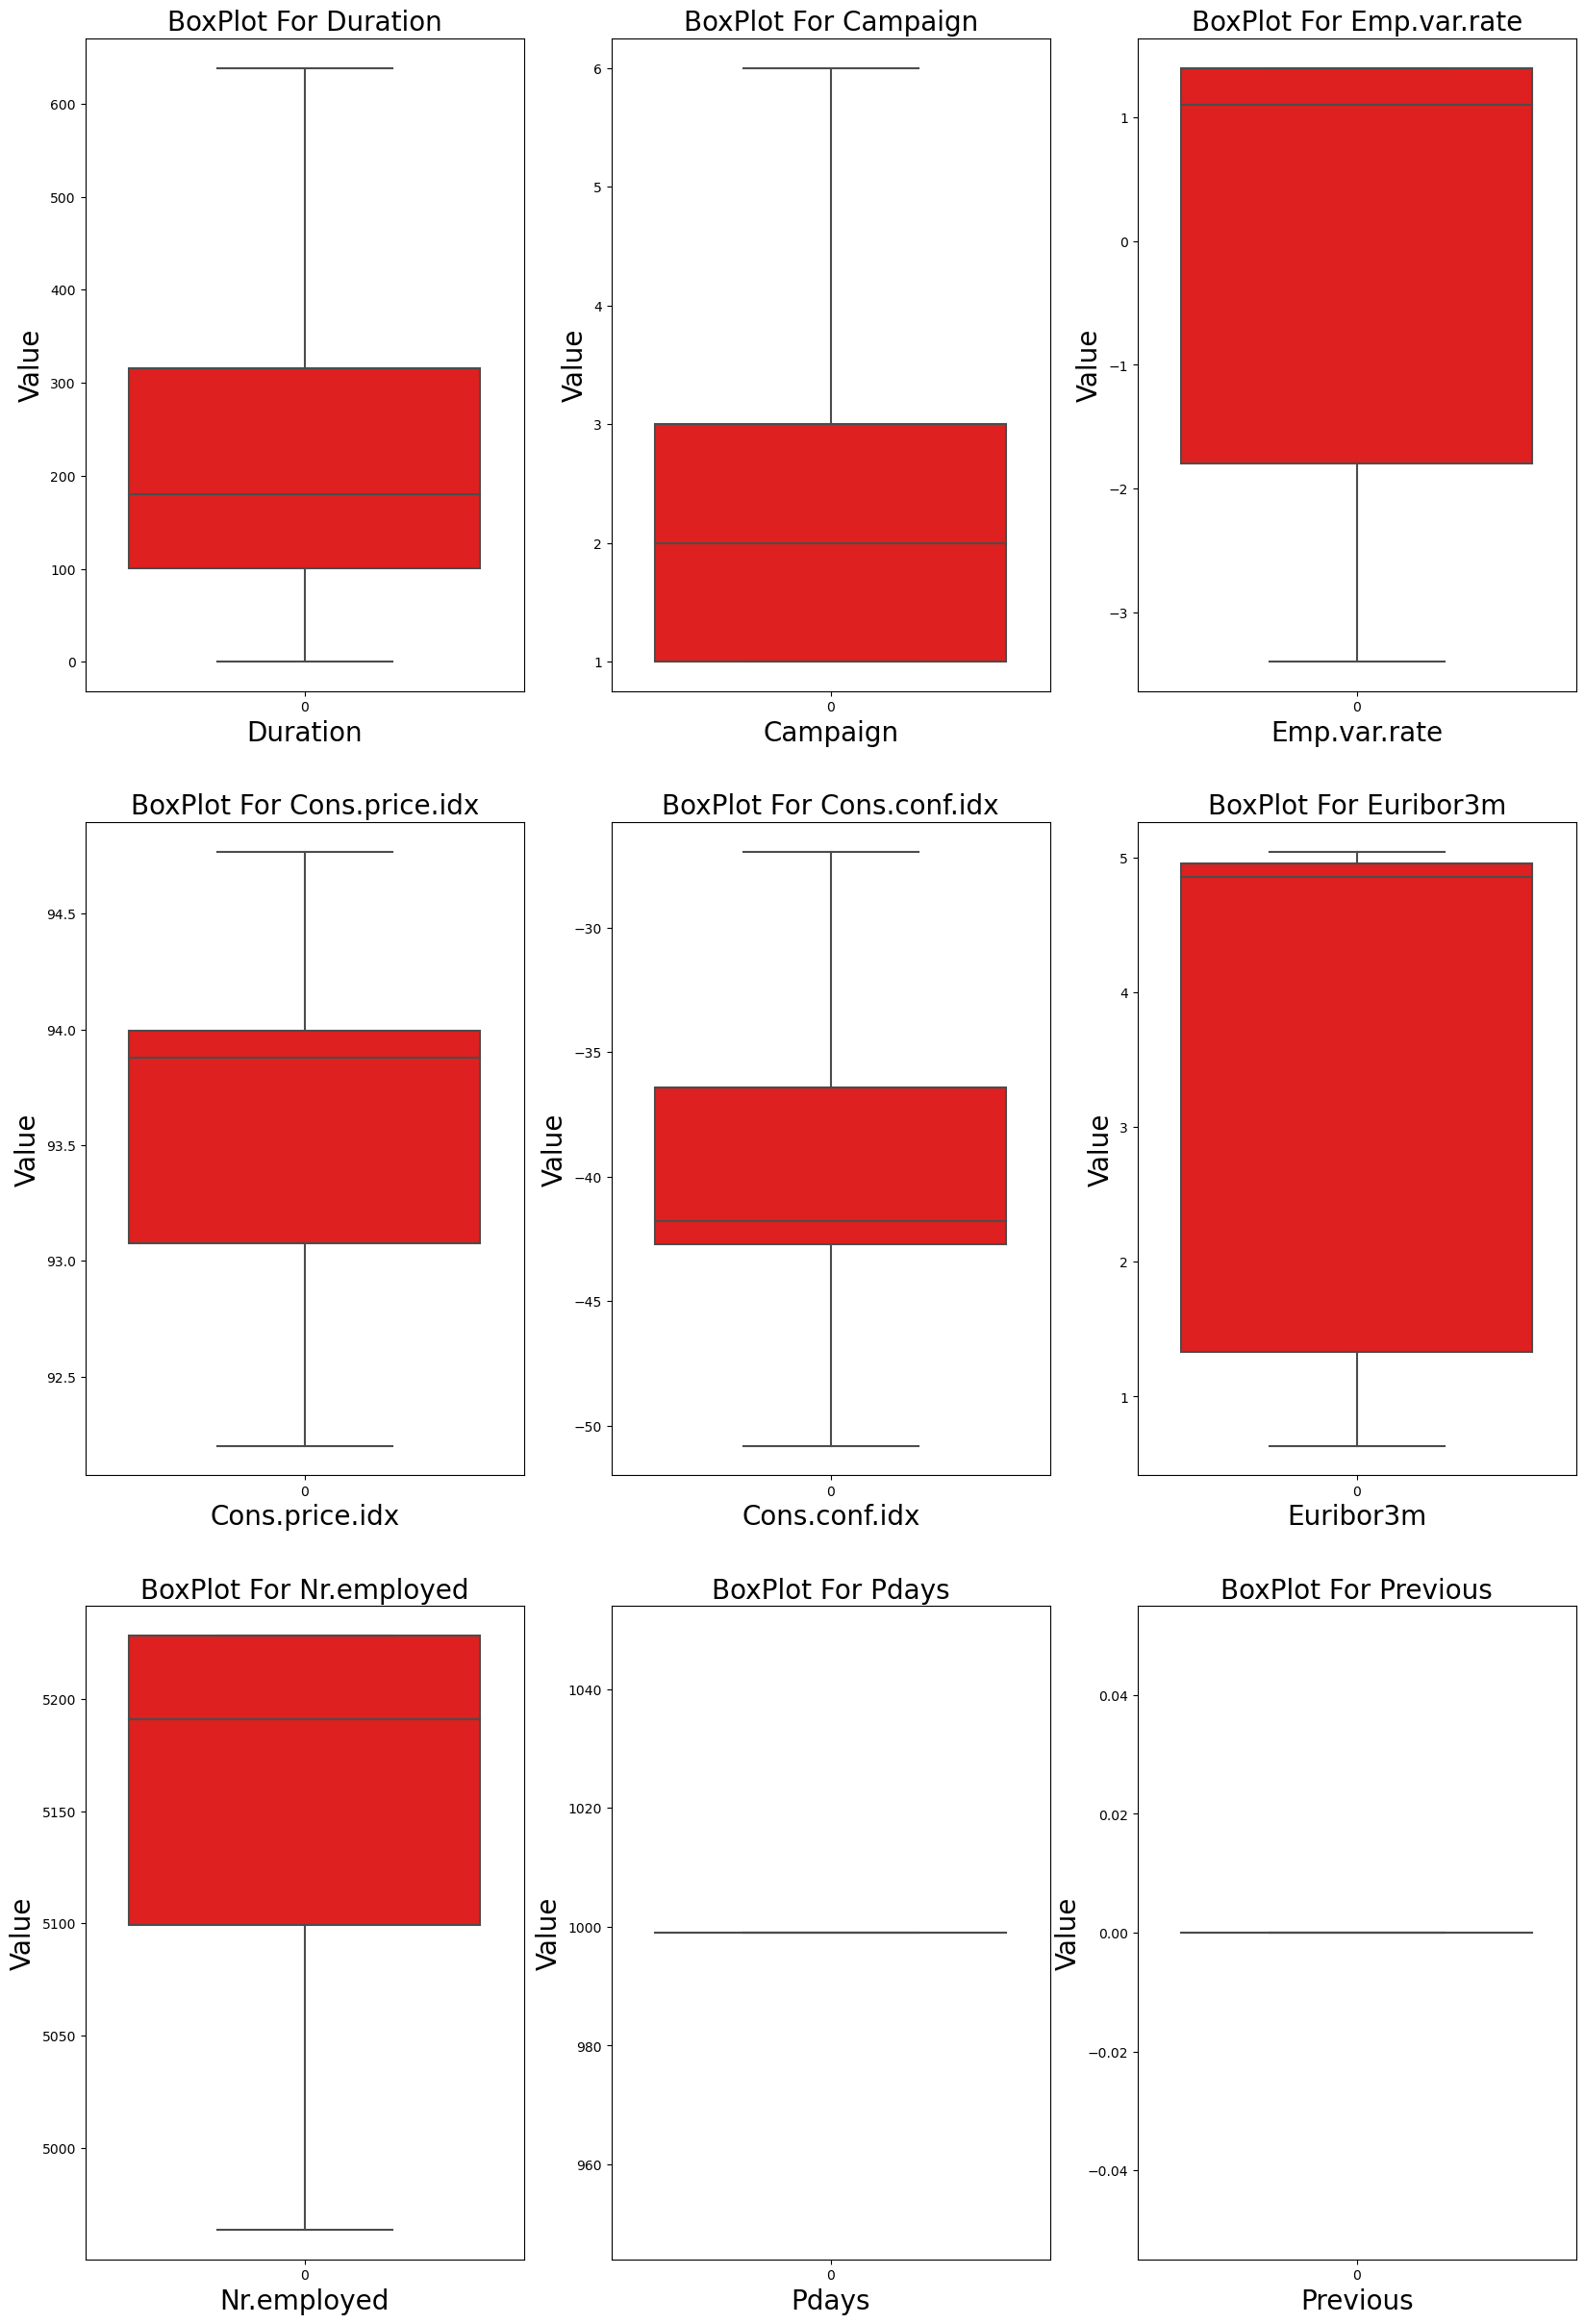

In [146]:
plt.figure(figsize=(20,30))
for i,x in enumerate(li):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=Bank[x],color='r')
    plt.title(f'BoxPlot For {x[0].upper()+x[1:]}',fontsize=20)
    plt.xlabel(f'{x[0].upper()+x[1:]}',fontsize=20)
    plt.ylabel('Value',fontsize=20)

In [147]:
X=Bank.iloc[:,:-1]
y=Bank.iloc[:,-1]
key=X.keys()
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,47.0,blue-collar,single,basic.9y,unknown,no,no,cellular,may,wed,159.0,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
2995,53.0,admin.,married,university.degree,no,no,yes,telephone,may,tue,37.0,6,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
2996,60.0,retired,married,university.degree,no,yes,no,cellular,oct,mon,338.0,2,999,0,nonexistent,-1.1,94.601,-49.5,1.000,4963.6
2997,32.0,technician,single,university.degree,no,no,no,cellular,nov,thu,485.0,1,999,0,failure,-0.1,93.200,-42.0,4.076,5195.8


In [148]:
y

0       no
1       no
2       no
3       no
4       no
        ..
2994    no
2995    no
2996    no
2997    no
2998    no
Name: y, Length: 2999, dtype: object

In [149]:
y.replace('no',0,inplace=True)
y.replace('yes',1,inplace=True)
y

0       0
1       0
2       0
3       0
4       0
       ..
2994    0
2995    0
2996    0
2997    0
2998    0
Name: y, Length: 2999, dtype: int64

In [150]:
'''X=pd.get_dummies(X)
key=X.keys()
X'''
label=LabelEncoder()
for i in X.select_dtypes(include='object').columns:
    X[i]=label.fit_transform(X[i])
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30.0,1,1,2,0,2,0,0,6,0,487.0,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39.0,7,2,3,0,0,0,1,6,0,346.0,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25.0,7,1,3,0,2,0,1,4,4,227.0,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38.0,7,1,2,0,1,1,1,4,0,17.0,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47.0,0,1,5,0,2,0,0,7,1,58.0,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,47.0,1,2,2,1,0,0,0,6,4,159.0,1,999,0,1,-1.8,92.893,-46.2,1.334,5099.1
2995,53.0,0,1,5,0,0,2,1,6,3,37.0,6,999,0,1,1.1,93.994,-36.4,4.856,5191.0
2996,60.0,5,1,5,0,2,0,0,8,1,338.0,2,999,0,1,-1.1,94.601,-49.5,1.000,4963.6
2997,32.0,9,2,5,0,0,0,0,7,2,485.0,1,999,0,0,-0.1,93.200,-42.0,4.076,5195.8


In [151]:
min_max=MinMaxScaler()
X=min_max.fit_transform(X)
X=pd.DataFrame(X,columns=key)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.233010,0.090909,0.333333,0.333333,0.0,1.0,0.0,0.0,0.666667,0.00,0.762725,0.2,0.0,0.0,0.5,0.333333,0.269680,0.192872,0.153741,0.512287
1,0.407767,0.636364,0.666667,0.500000,0.0,0.0,0.0,1.0,0.666667,0.00,0.541895,0.6,0.0,0.0,0.5,0.937500,0.698753,0.603774,0.956916,0.859735
2,0.135922,0.636364,0.333333,0.500000,0.0,1.0,0.0,1.0,0.444444,1.00,0.355521,0.0,0.0,0.0,0.5,1.000000,0.882307,0.377358,0.981179,1.000000
3,0.388350,0.636364,0.333333,0.333333,0.0,0.5,0.5,1.0,0.444444,0.00,0.026625,0.4,0.0,0.0,0.5,1.000000,0.882307,0.377358,0.980499,1.000000
4,0.563107,0.000000,0.333333,0.833333,0.0,1.0,0.0,0.0,0.777778,0.25,0.090838,0.0,0.0,0.0,0.5,0.687500,0.389322,0.368973,0.806349,0.877883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0.563107,0.090909,0.666667,0.333333,1.0,0.0,0.0,0.0,0.666667,1.00,0.249021,0.0,0.0,0.0,0.5,0.333333,0.269680,0.192872,0.158503,0.512287
2995,0.679612,0.000000,0.333333,0.833333,0.0,0.0,1.0,1.0,0.666667,0.75,0.057948,1.0,0.0,0.0,0.5,0.937500,0.698753,0.603774,0.957143,0.859735
2996,0.815534,0.454545,0.333333,0.833333,0.0,1.0,0.0,0.0,0.888889,0.25,0.529366,0.2,0.0,0.0,0.5,0.479167,0.935308,0.054507,0.082766,0.000000
2997,0.271845,0.818182,0.666667,0.833333,0.0,0.0,0.0,0.0,0.777778,0.50,0.759593,0.0,0.0,0.0,0.0,0.687500,0.389322,0.368973,0.780272,0.877883


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.025477,-0.393137,-0.109700,0.168743,-0.015821,0.002592,0.033885,-0.027023,-0.040523,...,-0.016634,NaN,NaN,0.014994,-0.002401,0.015024,0.080613,0.001306,-0.022595,0.051432
job,0.025477,1.000000,0.016405,0.126305,-0.028135,-0.013235,0.009303,-0.019466,-0.018015,-0.011699,...,-0.000434,NaN,NaN,-0.021114,-0.010026,-0.002251,0.053268,-0.005690,-0.021737,0.020826
marital,-0.393137,0.016405,1.000000,0.106464,-0.090142,0.001604,0.011279,-0.075343,-0.056019,0.010691,...,-0.015647,NaN,NaN,0.001965,-0.060149,-0.044692,-0.010861,-0.071312,-0.065562,0.042066
education,-0.109700,0.126305,0.106464,1.000000,-0.207816,0.039908,-0.022087,-0.109916,-0.081910,-0.045077,...,0.013886,NaN,NaN,0.027545,-0.066721,-0.084035,0.126322,-0.058826,-0.078148,0.062792
default,0.168743,-0.028135,-0.090142,-0.207816,1.000000,-0.018588,0.014556,0.154648,0.001620,-0.015446,...,0.016881,NaN,NaN,-0.000655,0.181479,0.160462,0.012396,0.174938,0.168757,-0.063415
housing,-0.015821,-0.013235,0.001604,0.039908,-0.018588,1.000000,0.075223,-0.077834,-0.048184,-0.004926,...,-0.001927,NaN,NaN,0.013349,-0.044906,-0.088557,-0.020210,-0.042092,-0.018531,-0.008933
loan,0.002592,0.009303,0.011279,-0.022087,0.014556,0.075223,1.000000,0.001446,-0.023136,0.009538,...,0.000524,NaN,NaN,-0.000850,-0.009688,-0.022055,0.003726,-0.002609,0.003613,-0.012271
contact,0.033885,-0.019466,-0.075343,-0.109916,0.154648,-0.077834,0.001446,1.000000,0.252156,0.008930,...,0.093530,NaN,NaN,0.132372,0.385667,0.566484,0.262884,0.393566,0.265451,-0.127740
month,-0.027023,-0.018015,-0.056019,-0.081910,0.001620,-0.048184,-0.023136,0.252156,1.000000,0.046004,...,-0.090951,NaN,NaN,-0.051607,-0.230404,-0.030388,-0.047699,-0.174511,-0.268198,0.006876
day_of_week,-0.040523,-0.011699,0.010691,-0.045077,-0.015446,-0.004926,0.009538,0.008930,0.046004,1.000000,...,-0.043327,NaN,NaN,0.002668,0.044271,0.001180,0.053989,0.054594,0.045263,-0.005471


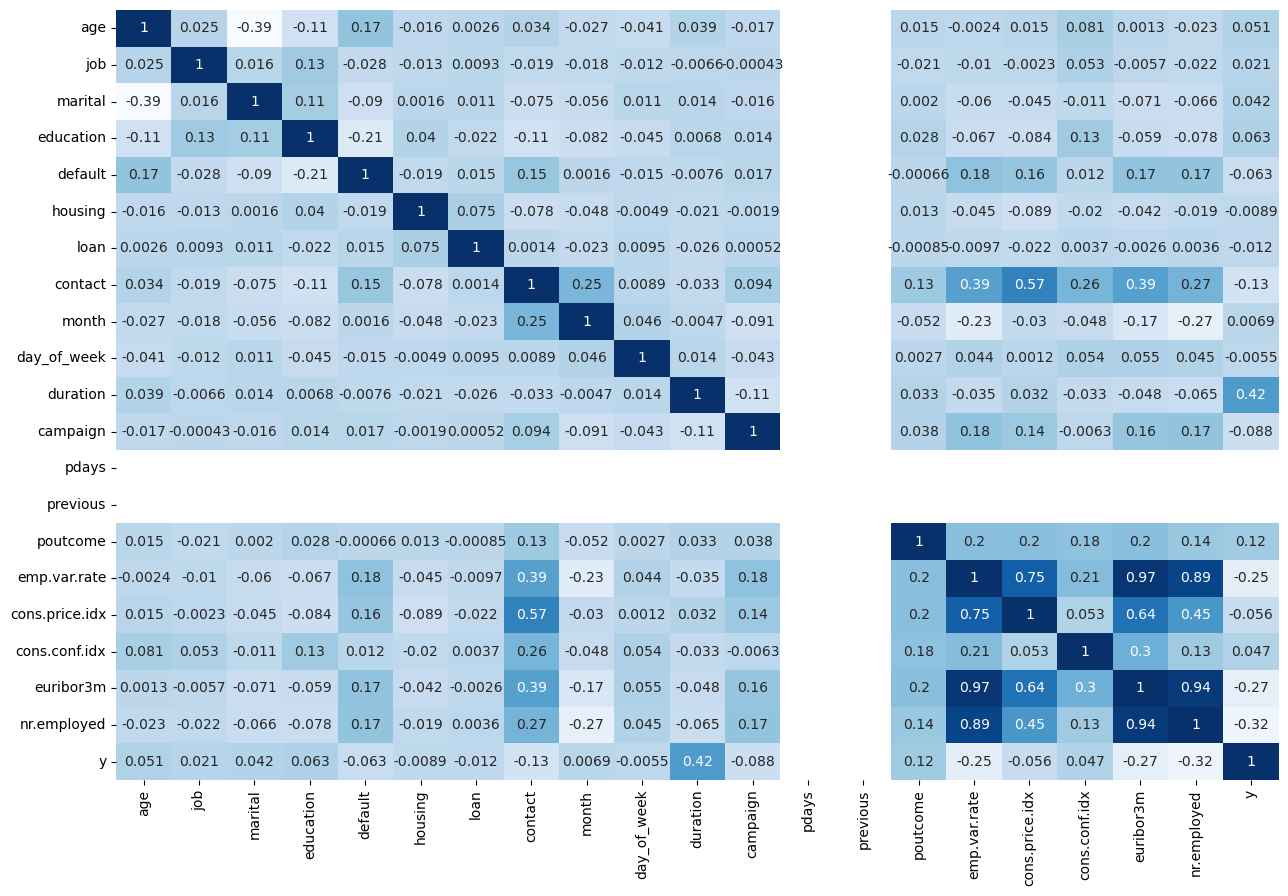

In [152]:
Bank2=X.copy()
Bank2['y']=y.copy()
plt.figure(figsize=(15,10))
sns.heatmap(Bank2.corr(),cbar=False,cmap='Blues',annot=True)
Bank2.corr()

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True,random_state=44)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (2399, 20)
X_test shape (600, 20)
y_train shape (2399,)
y_test shape (600,)


In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=44)
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)

X_train shape (2249, 20)
y_train shape (2249,)


In [155]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=.25,shuffle=True,random_state=44)
print('X_test shape',X_test.shape)
print('X_val shape',X_val.shape)
print('y_test shape',y_test.shape)
print('y_val shape',y_val.shape)

X_test shape (562, 20)
X_val shape (188, 20)
y_test shape (562,)
y_val shape (188,)


In [158]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(X.shape[1],),activation='relu',name='Dense_Layer1'))
model.add(keras.layers.Dense(256,activation='relu',name='Dense_Layer2'))
model.add(keras.layers.Dense(1,activation='sigmoid',name='Dense_Layer3'))

In [159]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer1 (Dense)        (None, 128)               2688      
                                                                 
 Dense_Layer2 (Dense)        (None, 256)               33024     
                                                                 
 Dense_Layer3 (Dense)        (None, 1)                 257       
                                                                 
Total params: 35969 (140.50 KB)
Trainable params: 35969 (140.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train, y_train, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
36/36 [==============================] - 1s 11ms/step - loss: 0.3717 - accuracy: 0.8857 - val_loss: 0.3787 - val_accuracy: 0.8564
Epoch 2/30
29/36 [=======================>......] - ETA: 0s - loss: 0.2882 - accuracy: 0.8922

C:\Users\hp\anaconda3\anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - 0s 6ms/step - loss: 0.2798 - accuracy: 0.8946 - val_loss: 0.3239 - val_accuracy: 0.8564
Epoch 3/30
36/36 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9031 - val_loss: 0.2746 - val_accuracy: 0.8830
Epoch 4/30
36/36 [==============================] - 0s 6ms/step - loss: 0.2029 - accuracy: 0.9088 - val_loss: 0.2674 - val_accuracy: 0.8777
Epoch 5/30
36/36 [==============================] - 0s 5ms/step - loss: 0.1974 - accuracy: 0.9062 - val_loss: 0.2497 - val_accuracy: 0.8883
Epoch 6/30
36/36 [==============================] - 0s 5ms/step - loss: 0.1879 - accuracy: 0.9133 - val_loss: 0.2470 - val_accuracy: 0.8723
Epoch 7/30
36/36 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9137 - val_loss: 0.2518 - val_accuracy: 0.8777
Epoch 8/30
36/36 [==============================] - 0s 5ms/step - loss: 0.1820 - accuracy: 0.9195 - val_loss: 0.2515 - val_accuracy: 0.8830
Epoch 9/30
36/36 [=============

In [161]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

18/18 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9021
Test Loss : 0.21940013766288757
Test accuracy : 0.9021352529525757


In [162]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.371705,0.885727,0.378678,0.856383
1,0.279781,0.894620,0.323910,0.856383
2,0.231726,0.903068,0.274572,0.882979
3,0.202943,0.908848,0.267438,0.877660
4,0.197362,0.906181,0.249700,0.888298
5,0.187894,0.913295,0.247016,0.872340
6,0.185120,0.913739,0.251813,0.877660
7,0.181993,0.919520,0.251502,0.882979
8,0.174216,0.919964,0.249340,0.867021
9,0.172297,0.924411,0.250850,0.861702


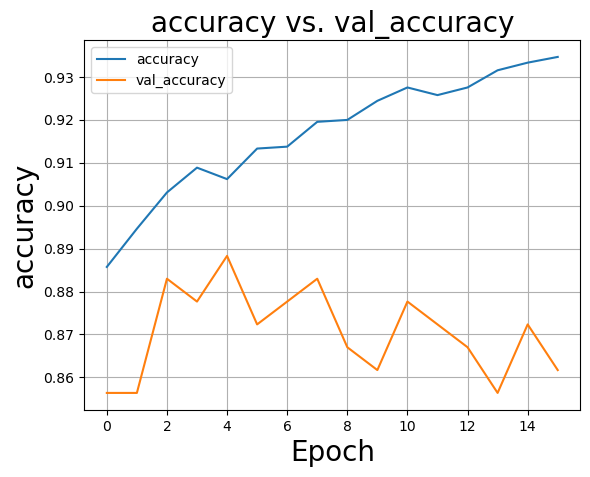

In [163]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

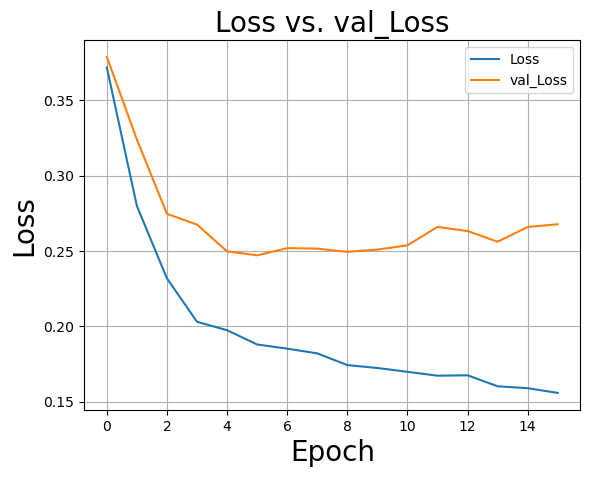

In [164]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [165]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

18/18 [==============================] - 0s 2ms/step


In [166]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
1331,0,0
649,0,0
2868,0,0
1766,0,0
1417,0,0
...,...,...
1292,0,1
1479,0,0
2025,0,0
1390,0,0


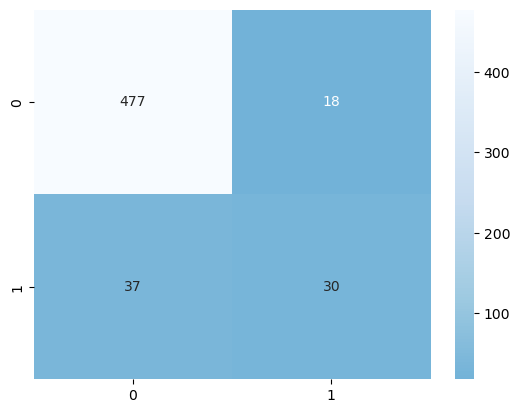

array([[477,  18],
       [ 37,  30]], dtype=int64)

In [167]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM


In [168]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.93      0.96      0.95       495
           1       0.62      0.45      0.52        67

    accuracy                           0.90       562
   macro avg       0.78      0.71      0.73       562
weighted avg       0.89      0.90      0.89       562



In [169]:
#over
over=RandomOverSampler(random_state=44)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
y_train_over.value_counts()

0    2012
1    2012
Name: y, dtype: int64

In [170]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model_over.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train_over, y_train_over, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
63/63 [==============================] - 1s 7ms/step - loss: 0.3207 - accuracy: 0.8738 - val_loss: 0.3558 - val_accuracy: 0.8245
Epoch 2/30
46/63 [====================>.........] - ETA: 0s - loss: 0.2777 - accuracy: 0.8974

C:\Users\hp\anaconda3\anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 0s 4ms/step - loss: 0.2838 - accuracy: 0.8936 - val_loss: 0.3652 - val_accuracy: 0.8351
Epoch 3/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8964 - val_loss: 0.3836 - val_accuracy: 0.8351
Epoch 4/30
63/63 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.9028 - val_loss: 0.3586 - val_accuracy: 0.8351
Epoch 5/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9085 - val_loss: 0.3675 - val_accuracy: 0.8351
Epoch 6/30
63/63 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9225 - val_loss: 0.3514 - val_accuracy: 0.8404
Epoch 7/30
63/63 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9250 - val_loss: 0.4070 - val_accuracy: 0.8085
Epoch 8/30
63/63 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9314 - val_loss: 0.3917 - val_accuracy: 0.8351
Epoch 9/30
63/63 [=============

In [171]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

18/18 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8630
Test Loss : 0.3086695075035095
Test accuracy : 0.8629893064498901


In [172]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.320658,0.873757,0.355815,0.824468
1,0.283768,0.893638,0.365202,0.835106
2,0.269304,0.896372,0.383650,0.835106
3,0.252401,0.902833,0.358602,0.835106
4,0.241623,0.908549,0.367521,0.835106
5,0.222841,0.922465,0.351376,0.840426
6,0.210048,0.924950,0.407043,0.808511
7,0.196339,0.931412,0.391691,0.835106
8,0.186823,0.936630,0.411170,0.840426
9,0.173123,0.944085,0.353072,0.867021


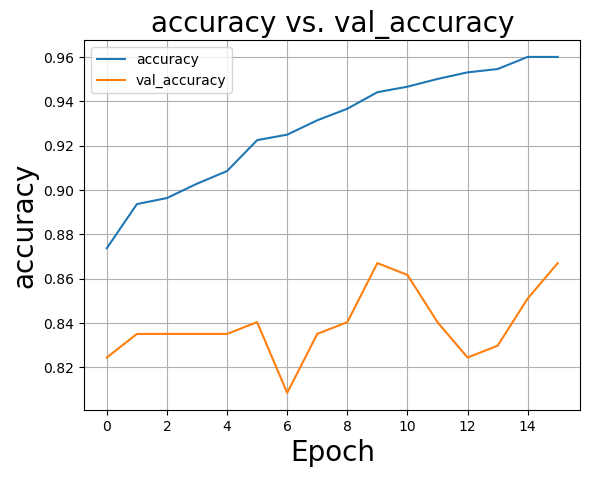

In [173]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

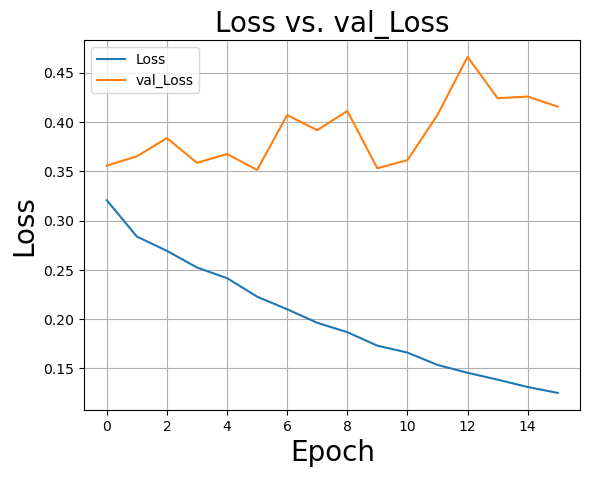

In [174]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [175]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

18/18 [==============================] - 0s 3ms/step


In [176]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
1331,0,0
649,0,0
2868,0,0
1766,0,0
1417,0,0
...,...,...
1292,0,1
1479,0,0
2025,0,0
1390,0,0


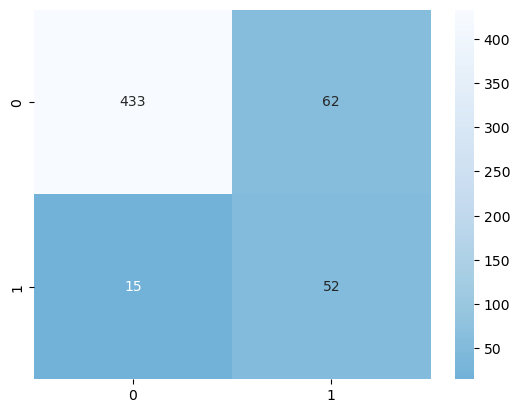

array([[433,  62],
       [ 15,  52]], dtype=int64)

In [177]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [178]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.87      0.92       495
           1       0.46      0.78      0.57        67

    accuracy                           0.86       562
   macro avg       0.71      0.83      0.75       562
weighted avg       0.91      0.86      0.88       562



In [179]:
#under
under=RandomUnderSampler(random_state=44)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
y_train_under.value_counts()

0    237
1    237
Name: y, dtype: int64

In [1]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model_under.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train_under, y_train_under, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

NameError: name 'model' is not defined

In [181]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

18/18 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8665
Test Loss : 0.31092506647109985
Test accuracy : 0.8665480613708496


In [182]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.217531,0.919831,0.350756,0.845745
1,0.196533,0.926160,0.416160,0.824468
2,0.192489,0.938819,0.424312,0.819149
3,0.191582,0.921941,0.387437,0.835106
4,0.179121,0.938819,0.425854,0.829787
5,0.172416,0.943038,0.422815,0.824468
6,0.166387,0.945148,0.425825,0.824468
7,0.162854,0.940928,0.434082,0.819149
8,0.158530,0.945148,0.436410,0.813830
9,0.154008,0.949367,0.451568,0.808511


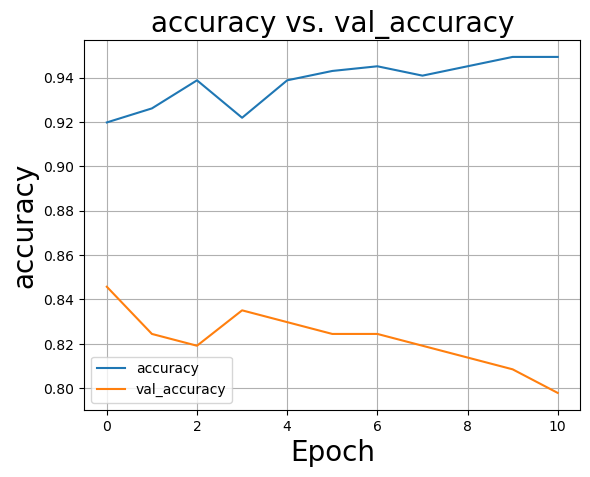

In [183]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

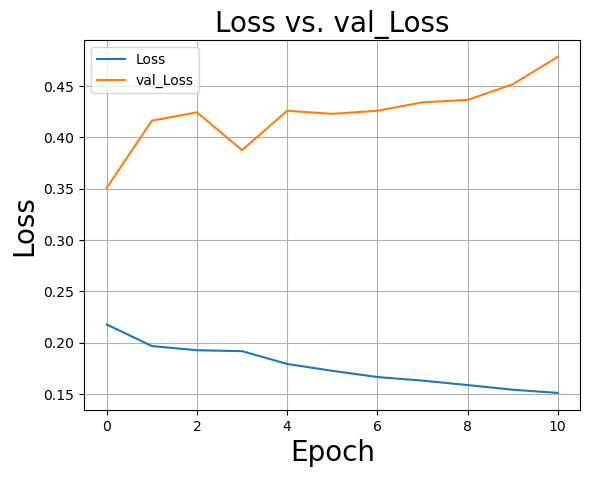

In [184]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [185]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

18/18 [==============================] - 0s 3ms/step


In [186]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
1331,0,0
649,0,0
2868,0,0
1766,0,0
1417,0,0
...,...,...
1292,0,1
1479,0,0
2025,0,0
1390,0,0


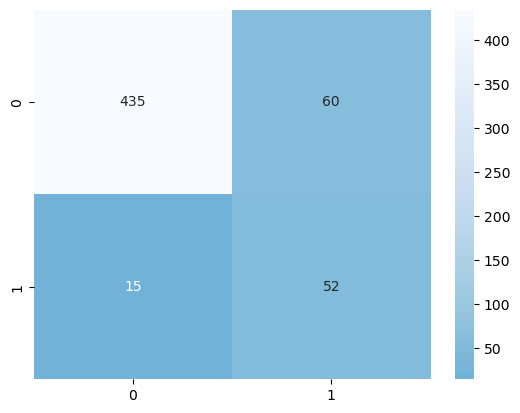

array([[435,  60],
       [ 15,  52]], dtype=int64)

In [187]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [188]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.88      0.92       495
           1       0.46      0.78      0.58        67

    accuracy                           0.87       562
   macro avg       0.72      0.83      0.75       562
weighted avg       0.91      0.87      0.88       562

